# Modulación LoRa - Notebook conceptual

## Concepto Principal

La modulación LoRa es una de las maneras de transmitir mensajes digitales a través de técnicas de modulación de **espectro expandido**. $^1$ 

Específicamente, este tipo de modulación es una técnica de espectro expandido con codificación a base de chirps (CSS). **Un chirp** es aquella señal en la cual va aumentando o disminuyendo su frecuencia a lo largo del tiempo. En este caso, se trabaja con un chirp con barrido de frecuencia lineal, por lo que la frecuencia instantánea será de la forma:

 $y = b + m\cdot t$

Para luego transmitir la señal como una exponencial compleja, modulada en fase en función de la acumulación de frecuencia instantánea:

$y(t) = c \cdot e^{2\pi \int_{0}^{t}f(\tau)d\tau}$

### Distinguiendo símbolos

La manera que tiene LoRa de diferenciar entre símbolos radica simplemente en definir a la ordenada al origen de cierta forma para que esté en función del símbolo a enviar, haciendo que este esté implicito en la forma de onda resultante. La completa definición se verá en la sección del desarrollo matemático.

*$^1$ La modulación de espectro expandido es aquel tipo de modulación en el cual la señal a transmitir está dispersa en el campo de la frecuencia en mayor medida de la necesaria para transmitir información. De esta forma, se permite construir técnicas de modulación con mayor resistencia al ruido e interferencias. Además, la potencia también está mejor distribuida en estas frecuencias, asemejándose a la densidad espectral de potencia del ruido, por lo que tiene también importancia en la seguridad. Que la PSD de la señal sea bien distribuida, implica que la autocorrelación solo estará presente cuando no hay retardos en el tiempo, por lo que muestrear la señal sincronizada es muy importante.*




## Parámetros Externos para el MoDem

En esta sección se explorarán los parámetros que definen como funcionará nuestro MoDem LoRa.

- Spreading Factor ($SF$): El factor de expansión de una modulación LoRa por sí mismo solo define explícitamente la cantidad de bits contenidos en un símbolo. Sin embargo, su parámetro interno ($2^{SF}$) nos permitirá entender más conceptos asociados a la modulación (se aborda más adelante). Los valores típicos son: [7, 8, 9, 10, 11, 12]
- Bandwidth ($Bw$): El ancho de banda define los valores en frecuencia que limitarán al barrido del chirp y a su vez es un factor determinante en la duración de un símbolo. Los valores típicos son: [125kHz, 250kHz, 500kHz]
- Samples per Chip ($spc$): La cantidad de muestras por chip o *"trozo"* $^{2}$. Representa la cantidad de muestras que cada chip de tiempo tendrá.

$^2$ Para entneder lo que es un chip en la modulación LoRa, se puede explorar de donde se hereda su término, o sea de la modulación de espectro expandido de forma directa: En un sistema DSS, cada bit de información que se transmita se multiplicará por un codigo de expansión o secuencia de chips específica, que es donde sucede la expansión característica del espectro. De esta forma, para una frecuencia de llegada de bits no codificados, se tendrá una frecuencia mayor de bits codificados por la secuencia de expansión. A estos bits de mayor tamaño se los conoce como chips.

En el marco de la modulación LoRa, por cada símbolo transmitido (SF) se tendrá que computar $2^{SF}$ chips como mínimo, ya que cada uno ocupará un rango de frecuencia específico. Estos se distribuyen en el tiempo y es entonces como sucede la expansión del espectro.

Si bien uno podría objetar que la cantidad de muestras por chips cambia la cantidad de muestras computadas, ésto solamente repercute en la descripción gráfica de la señal, puesto que este parámetro **no permite que se puedan modular una mayor cantidad de símbolos**, ya que las formas de onda del conjunto $\mathcal W$ permanecen iguales en cantidad y cada una mantiene su símbolo original asociado.


## Parámetros Internos para el MoDem

En esta sección se abordarán los distintos parámetros de los que se hace uso en repetidas ocasiones, que se originan directamente de los parámetros ya vistos.

- $2^{SF}$: Esta potencia nos indica muchas cuestiones acerca de nuestra modulación a estudiar:
  - Número de símbolos posibles para transmitir: Una modulación LoRa podrá transmitir desde el símbolo 0 hasta el símbolo $2^{SF}-1$. 
  - Número de chips por símbolo: Son el mínimo número de chips temporales necesarios en un símbolo para poder asignarle un valor temporal a cada incremento de frecuencia. Es decir, que como mínimo en un código se tendrán $2^{SF}$ muestras.
  - Número de formas de onda posibles: Para cada símbolo habrá una forma de onda distinta a las otras. Justamente una demodulación propuesta pero no llevada a cabo en este trabajo (ineficiente por sus largos tiempos de cómputo) podría consistir en hacer la correlación de la señal recibida con las $2^{SF}$ señales posibles, y de esa manera asumir que el símbolo recibido sea el asociado a la que logre mayor correlación.
  

- Duración de Símbolo: La duración de símbolo nos permite saber cuanto se tarda para que se complete la transmisión de un símbolo. Se define como el producto de la duración de un solo chip temporal por la cantidad de chips presentes en un símbolo, es decir:
  
  - $T_s = 2^{SF} \cdot \frac{1}{Bw} = \frac{2^{SF}}{Bw}$

- Samples per Symbol: La cantidad total de muestras por símbolo estará dada por el producto de la cantidad de chips por símbolo por la cantidad de muestras por cada chip, a saber:
  
  - $SPS = SPC \cdot 2^{SF}$

- Frequency Slope: Corresponde a la pendiente que tendrá la función frecuencia instantánea a lo largo del tiempo. Por lo tanto, se define como la tasa de cambio que esta función experimentará, quedando manifestada como lo indica la definición de *pendiente*:
  - $m = \frac{\Delta y}{\Delta t} = \frac{(Bw - 0)}{(T_{s} - 0)} = \frac{Bw}{T_{s}} = \frac{Bw^2}{2^{SF}}$

- Constante de tiempo de Discontinuidad: Nos permite conocer, para un símbolo dado por transmitir, el momento en el que ocurrira la discontinuidad de la frecuencia instantánea. Su desarrollo se encuentra a continuación:

  - $f(C, t) = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot t$

  - $Bw = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot \tau _d$
  - $\frac{Bw - C \frac{Bw}{2^{SF}} } {\frac{Bw^2}{2^{SF}}} = \tau _d$
  - $\frac{1 -  \frac{C}{2^{SF}} } {\frac{Bw}{2^{SF}}} = \tau _d$
  - $\frac{2^{SF}-C}{Bw} = \tau _d$

## Discretizando las Muestras de Tiempo

Sabemos por los parámetros internos que la duración de un símbolo es de:
$T_s = \frac{2^{SF}}{Bw}$
Si queremos distribuir una cantidad de muestras de manera tal que encajen correctamente a lo largo de todo el eje temporal, deberemos tener en cuenta lo siguiente:
1. Si bien la duración del símbolo es $T_s = \frac{2^{SF}}{Bw}$, la última muestra no debería bajo ningún concepto tomar este valor. Esto se debe al hecho de que esta muestra ya sería la primera del siguiente símbolo, y para evitar cualquier solapamiento es necesario tener esto en cuenta.
2. La cantidad de muestras debe ser sí o sí $2^{SF} \cdot SPC$.
3. La cantidad de muestras deben estar equiespaciadas a lo largo del tiempo. Si bien esto es trivial, la realidad es que este item será determinante a la hora de seguir el código.

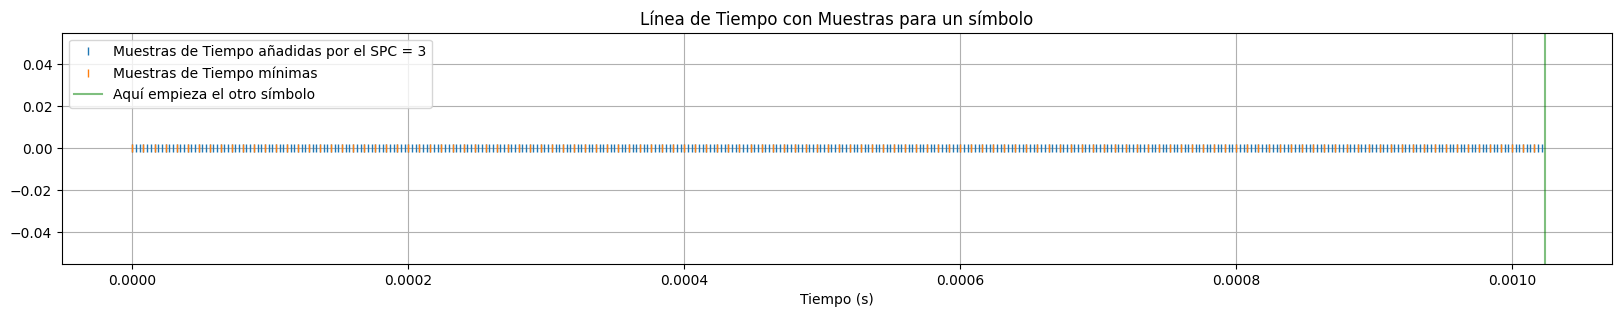

La duración del símbolo es de:  0.001024  segundos. La última muestra de tiempo es:  0.001021  segundos.


In [1]:
# Discretizando las Muestras de Tiempo - Código de Ejemplo
import matplotlib.pyplot as plt
import numpy as np
def generate_time_samples(spreading_factor, bandwidth, samples_per_chip):
    
    # Definimos la duración de símbolo en segundos
    symbol_time = ( 2**spreading_factor ) / bandwidth

    # Definimos la cantidad de muestras por símbolo
    samples_per_symbol = int( ( 2**spreading_factor ) * samples_per_chip )

    # Generamos las muestras de tiempo (serán 129 muestras equiespaciadas, para luego sacar la última, asi logramos el punto 1 y punto 2 en una sola línea de código)
    # También es equivalente si establecemos el parámetro de numpy.linspace "endpoint" a False, pero de esta forma se entiende mejor el concepto.
    # La función numpy.linspace genera un vector de muestras equiespaciadas. Esto es mejor que utilizar np.arange, ya que acumula más errores de redondeo. (ver: https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
    timeline = np.linspace(0, symbol_time, samples_per_symbol + 1)
    timeline = timeline[0:-1]

    return timeline

# ---------------------------------------------------------------------

spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 3 #  Definimos los parámetros

timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
timeline_spc_1 = generate_time_samples(spreading_factor, bandwidth, 1)

# Plotear la línea de tiempo con puntos en las muestras
plt.figure(figsize=(20, 3))
plt.plot(timeline, np.zeros_like(timeline), '|', label='Muestras de Tiempo añadidas por el SPC = '+str(samples_per_chip))
plt.plot(timeline_spc_1, np.zeros_like(timeline_spc_1), '|', label='Muestras de Tiempo mínimas')
plt.xlabel('Tiempo (s)')
plt.axvline(x=( 2**spreading_factor ) / bandwidth, color='g', linestyle='-', label='Aquí empieza el otro símbolo', alpha = 0.5)
plt.title('Línea de Tiempo con Muestras para un símbolo')
plt.legend()
plt.grid(True)
plt.show()
print("La duración del símbolo es de: ", ( 2**spreading_factor ) / bandwidth, " segundos. La última muestra de tiempo es: ", round(timeline[-1], 6), " segundos.")



## Desarrollo Matemático

### Función de Frecuencia Instantánea

Para abordar el desarrollo matemático de la modulación LoRa, se partirá desde el análisis de la frecuencia a lo largo del tiempo, la cual sabemos será consecuente a la de una codificación por chirp.

Como vimos anteriormente, un chirp lineal en el tiempo será del tipo:
$f(t) = b + m\cdot t$

Sin embargo, recordando como se define la pendiente para un $SF$ y $Bw$ dado, podemos especificar la función de frecuencia como:

$m_f = \frac{Bw}{T_s}=\frac{Bw^2}{2^{SF}}$

$f(t) =  b + \frac{Bw}{T_s} \cdot t$

Además, siguiendo lo visto en la última subsección de Concepto Principal (*Distinguiendo símbolos*), sabemos que la ordenada al origen será la responsable de atribuirle un símbolo a la forma de onda creada. Esta atribución se origina al ponderar por el valor del símbolo al mínimo intervalo de frecuencia posible, escalando así el valor del símbolo a un valor característico en $[Hz]$:

$b(c) = c \cdot \Delta f$

Sin embargo, podemos definir a este intervalo mínimo como la razón entre el ancho de banda y la cantidad de chips:

$b(c) = c \cdot \frac{Bw}{2^{SF}}$

Quedando así, la función de frecuencia instantánea sin discontinuidades:

$f(c, t) = c \cdot \frac{Bw}{2^{SF}} + \frac{Bw}{T_s} \cdot t$

Es necesario aclarar que para una función dada de frecuencia instantánea, se tendrá que contemplar los límites discutidos en la sección de parámetros internos, con respecto al parámetro *$Bw$*. Por lo tanto, se deberá *reiniciar* el valor de esta frecuencia a lo largo del tiempo una vez se alcancen estos límites ($0$ para un downchirp y $Bw$ para un upchirp o cualquier símbolo trasmitido), generando así una discontinuidad.

Para poder representar esto, se aprovechará que la función indicadora $^{1}$ permite cambiar el valor de algo cuando una variable pertenece a un conjunto. Esta herramienta, que a su vez se parece mucho a un condicional if, se le puede sumar el parámetro interno de "Constante de tiempo de discontinuidad":

$\tau _d(C) = \frac{1}{Bw}\cdot(2^{SF}-C)$

De esta forma, podremos definir ahora a la función de frecuencia instantánea como aquella función lineal a la que se le resta el valor de $Bw$ cuando el tiempo es mayor a esta constante de discontinuidad y aún no terminó de transmitirse el símbolo actual:

$f(C, t) = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw}{T_s} \cdot t - Bw\cdot \Chi_{\{ \tau _d(C) \leq t < T_s \}}$

Por último, y para agregar una capa de formalidad más, deberemos tener en cuenta que en un paquete de transmisión, uno podría encontrar más de un símbolo. Por lo tanto, introduciremos el parámetro $n$ que simplemente será el factor que determinará (desde el 0) que símbolo será el asociado a esa evolución de frecuencia:

$f(C, t, n) = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw}{T_s} \cdot (t - nT_s) - Bw\cdot \Chi_{\{ \tau _d(C) \leq (t-nT_s) < T_s \}}$

$^{1}$ Se eligió abordar el desgloce teórico mediante la función indicadora en contraposición al operador módulo por tres razones:
- Es una nomenclatura más cercana a lo abordado en la materia y por lo tanto más fácil de entender. (Explícita en el libro de Bixio)
- Es una manera de unificar nomenclaturas, ya que en el apartado siguiente se verá como el módulo será inútil para abordar a la discontinuidad al integrar la señal (debido a la definición de fase instantánea)
- Se asemeja al *if statement* de cualquier lenguaje de programación.
  
Sin embargo, el operador módulo es equivalente.

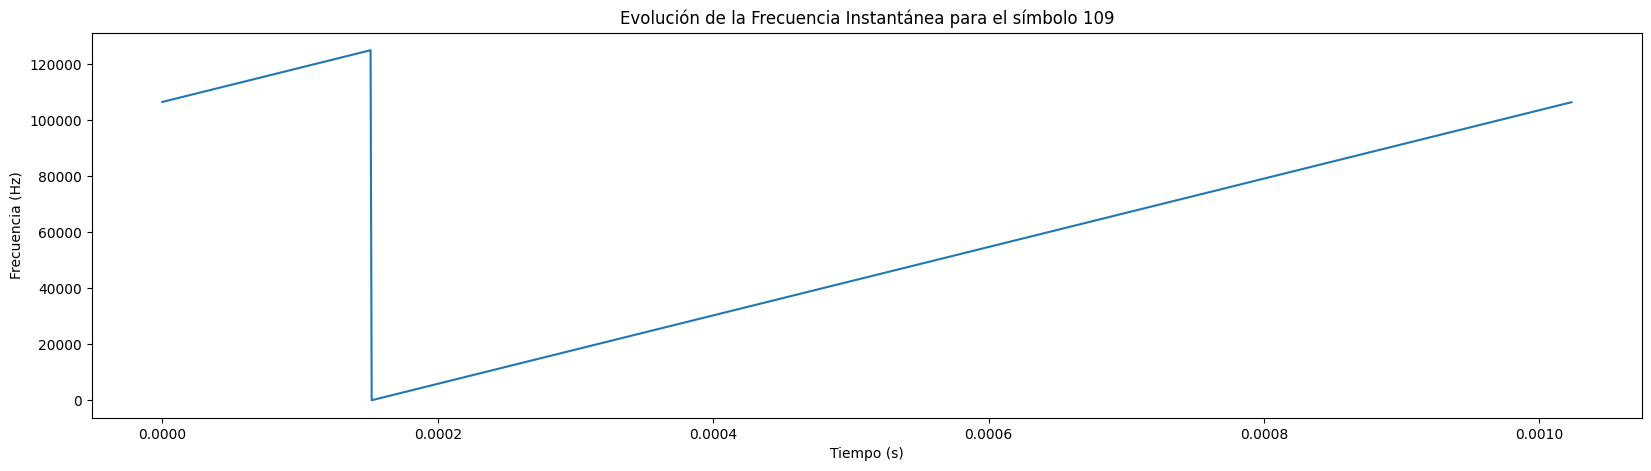

In [2]:
# Frecuencia Instantánea - Código de Ejemplo
def generate_frequency_evolution(timeline, symbol, spreading_factor, bandwidth):
    frequency_slope = bandwidth**2 / ( 2**spreading_factor )
    y_intercept = symbol * (bandwidth/2**spreading_factor)
    frequency_evolution = ( y_intercept + frequency_slope * timeline ) % bandwidth
    return frequency_evolution

# ---------------------------------------------------------------------
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 10 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = np.random.randint(0, 2**spreading_factor) # Definimos el símbolo a analizar
frequency_evolution = generate_frequency_evolution(timeline, symbol, spreading_factor, bandwidth) # Generamos la evolución de la frecuencia
plt.figure(figsize=(20, 5))
plt.plot(timeline, frequency_evolution)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Evolución de la Frecuencia Instantánea para el símbolo ' + str(symbol))
plt.show()



### Señal Exponencial Compleja

Una vez se tiene la función de frecuencia instantánea resuelta, se debe traducir esta evolución de frecuencia en una portadora. Para ello, se emplea una exponencial compleja modulada en fase por esta evolución.

Partiendo de la mínima expresión de una exponencial compleja, tenemos:

$s(t) = K e^{j\phi(t)}$

Sabemos además, que la fase instantánea se define como:

$\displaystyle \phi(t) = 2 \pi \int_{0}^{t}f(\tau)d\tau$

Por lo tanto, sabemos que entonces la exponencial compleja pasará a ser:

$s(t) = A e^{j \cdot2 \pi \cdot \int_{0}^{t}f(\tau)d\tau}$

Por otro lado, podemos resolver esta integral si partimos, una vez más, de la función libre de discontinuidades:

$\displaystyle \int_{0}^{t}f(\tau)d\tau = \int_{0}^{t} (c \cdot \frac{Bw}{2^{SF}} + \frac{Bw}{T_s} \cdot \tau )d\tau$

$\displaystyle \int_{0}^{t}f(\tau)d\tau = \int_{0}^{t} (c \cdot \frac{Bw}{2^{SF}})d\tau + \int_{0}^{t} (\frac{Bw}{T_s} \cdot \tau )d\tau$

$\displaystyle \int_{0}^{t}f(\tau)d\tau = c \cdot \frac{Bw}{2^{SF}}\cdot \tau \bigg|_{0}^{t} + \frac{Bw}{T_s} \cdot \frac{\tau^2}{2} \bigg|_{0}^{t} $

$\displaystyle \int_{0}^{t}f(\tau)d\tau = c \cdot \frac{Bw}{2^{SF}}\cdot t + \frac{Bw}{T_s} \cdot \frac{t^2}{2}  $

$\displaystyle \int_{0}^{t}f(\tau)d\tau = ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  $

Una vez calculada la integral de nuestra función continua, procederemos a analizar gráficamente a la misma para poder determinar como tener en cuenta a la discontinuidad característica de cualquier símbolo:

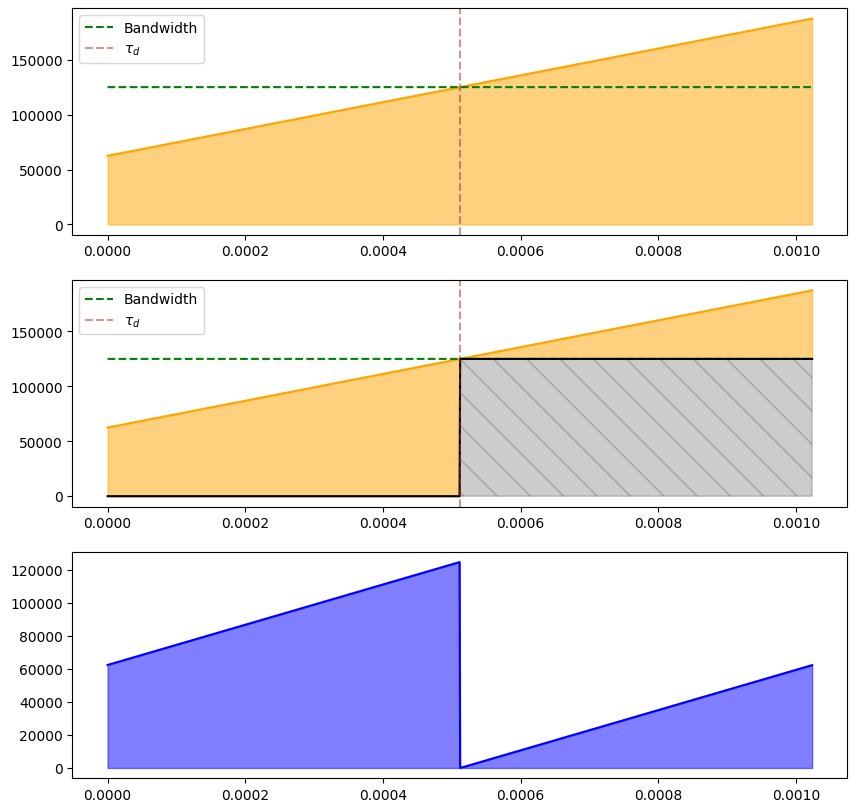

Como se puede observar, cuando el tiempo excede la constante temporal de discontinuidad, a la función libre de discontinuidades se le debe restar el área sobrante dada por la fórmula propia de un rectángulo, cuya base resulta variable y en función del tiempo:
$A(t) = b(t)h = (t - \tau _d)\cdot(Bw)$

Por lo tanto, obtendremos así la función de la frecuencia instantánea, integrada en el tiempo:

$\displaystyle \int_{0}^{t}f(\tau)d\tau = ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}}$

Y de la misma manera, la función de la fase instantánea:

$\phi (t)=2\pi \cdot ( ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}} )$

De esta forma, y añadiendo el coeficiente de magnitud $K$, tendremos:

$K = \frac{1}{\sqrt{2^{SF}SPC}}$

$s(c,t) = K e^{j\phi(c, t)}$

$s(c,t) = \frac{1}{\sqrt{2^{SF}SPC}} e^{j\phi(c, t)}$

$s(c,t) = \frac{1}{\sqrt{2^{SF}SPC}} e^{j 2\pi \cdot ( ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}} )}$

*Nota: Se omite la representación matemática para enviar varios símbolos en serie para simplificar. Sin embargo, si se quisiese hacer ese análisis solamente habría que hacer un cambio de variable a $(t -nT_s)$*


In [3]:
def generate_signal_phase(timeline, symbol, spreading_factor, bandwidth):
    signal_phase = []
    auxiliar_slope = (bandwidth**2/2**(spreading_factor + 1))
    auxiliar_intercept = symbol * (bandwidth/2**spreading_factor)
    discontinuity_time = (2**spreading_factor - symbol) * (1/bandwidth)
    for t in timeline:
        inst_phase = ( auxiliar_intercept + auxiliar_slope * t ) * t

        if t >= discontinuity_time:
            inst_phase -= (t - discontinuity_time)*(bandwidth)
            
        signal_phase = np.append(signal_phase, inst_phase)
    signal_phase = 2 * np.pi * signal_phase
    return signal_phase

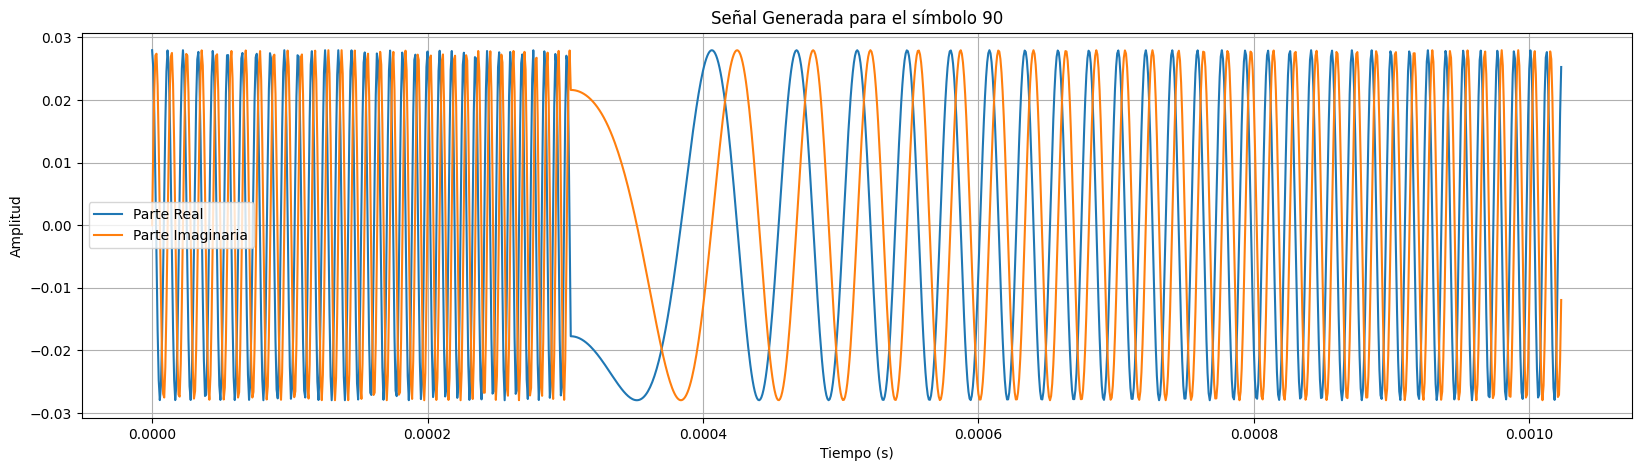

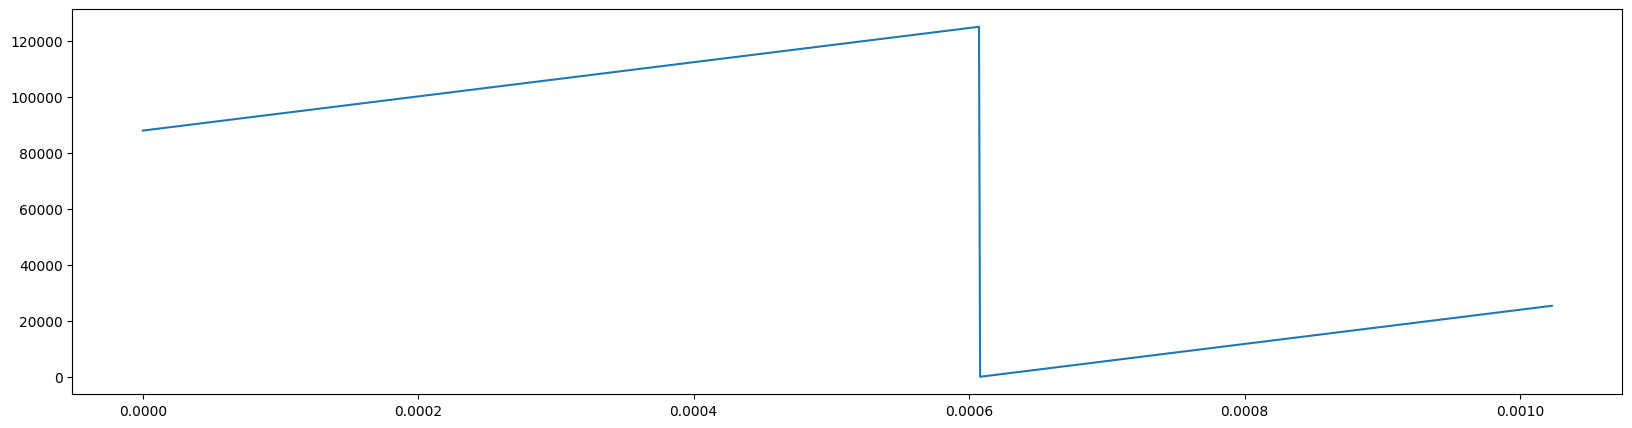

In [4]:
def generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip):
    signal = np.array([])
    auxiliar_slope = 0.5 * ( bandwidth**2 /  2**spreading_factor )
    y_intercept = symbol * ( bandwidth / 2**spreading_factor )
    frequency_evolution = ( y_intercept + auxiliar_slope * timeline ) % bandwidth 
    signal_coefficient = 1/np.sqrt(2**spreading_factor * samples_per_chip)
    instantaneous_phase = 2 * np.pi * ( (frequency_evolution * timeline) )
    instantaneous_phase = generate_signal_phase(timeline, symbol, spreading_factor, bandwidth)
    signal = signal_coefficient * np.exp(1j * instantaneous_phase) 
    
    return signal, frequency_evolution
# ---------------------------------------------------------------------
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 10 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = 90 # Definimos el símbolo a analizar
signal,f_test = generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip) # Generamos la señal
plt.figure(figsize=(20, 5))
plt.plot(timeline, np.real(signal), label='Parte Real')
plt.plot(timeline, np.imag(signal), label='Parte Imaginaria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Generada para el símbolo '+str(symbol))
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(20, 5))
plt.plot(timeline, f_test)